In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, precision_score, f1_score

In [ ]:
tips = sns.load_dataset("tips")
data= tips[["total_bill", "tip"]].values
data.shape



(244, 2)

In [ ]:
model = IsolationForest(contamination=0.1,random_state=40)
model.fit(data)


IsolationForest(contamination=0.1, random_state=40)

In [ ]:
outliers = model.predict(data)


In [ ]:
num_anomalies = np.sum(outliers == -1)


In [ ]:
anomalies = data[outliers == -1]

In [ ]:
print(f"Number of Anomalies: {num_anomalies}")
print("Anomalies (10% of the dataset):")
print(anomalies)


Number of Anomalies: 25
Anomalies (10% of the dataset):
[[16.99  1.01]
 [39.42  7.58]
 [32.4   6.  ]
 [48.27  6.73]
 [ 3.07  1.  ]
 [24.71  5.85]
 [ 5.75  1.  ]
 [40.17  4.73]
 [44.3   2.5 ]
 [ 7.25  1.  ]
 [38.07  4.  ]
 [34.3   6.7 ]
 [41.19  5.  ]
 [48.17  5.  ]
 [50.81 10.  ]
 [ 7.25  5.15]
 [ 9.6   4.  ]
 [23.33  5.65]
 [45.35  3.5 ]
 [23.17  6.5 ]
 [40.55  3.  ]
 [43.11  5.  ]
 [48.33  9.  ]
 [28.17  6.5 ]
 [32.83  1.17]]


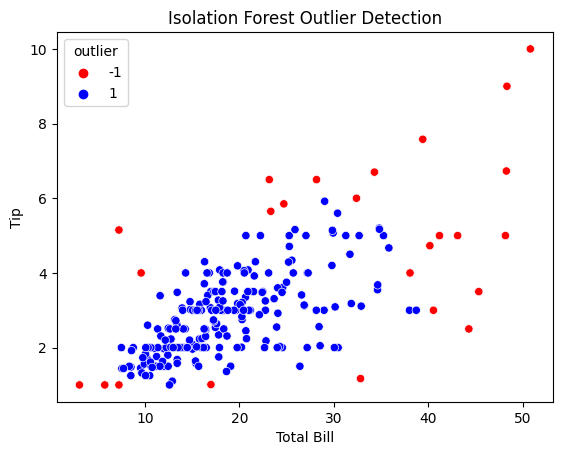

In [ ]:
tips["outlier"] = outliers

sns.scatterplot(x="total_bill", y="tip", data=tips, hue="outlier", palette={1: "blue", -1: "red"})
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.title("Isolation Forest Outlier Detection")
plt.show()


In [ ]:
synthetic_anomalies = [-1 if i < 0.1 * len(outliers) else 1 for i in range(len(outliers))]

# Calculate metrics
accuracy = accuracy_score(synthetic_anomalies, outliers)
precision = precision_score(synthetic_anomalies, outliers, pos_label=-1)
f1 = f1_score(synthetic_anomalies, outliers, pos_label=-1)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1-score:", f1)

Accuracy: 0.8114754098360656
Precision: 0.08
F1-score: 0.08
